In [2]:
import numpy as np
import matplotlib.pyplot as plt

<center> Sine Wave </center>


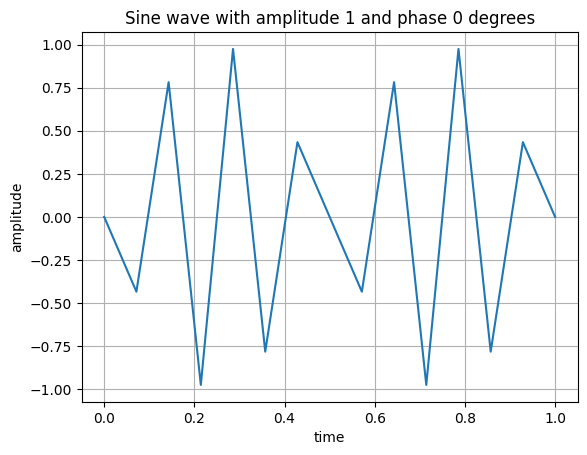

In [12]:
def sine_wave(amplitude, phase_deg):
    sampling_rate = 15
    freq = 8
    x = np.linspace(start=0, stop=1, num=sampling_rate)
    y = amplitude * np.sin(2 * np.pi * freq * x + np.deg2rad(phase_deg))

    plt.title(f"Sine wave with amplitude {amplitude} and phase {phase_deg} degrees")
    plt.grid(True)
    plt.plot(x, y)
    plt.xlabel("time")
    plt.ylabel("amplitude")
    plt.show()


sine_wave(amplitude=1, phase_deg=0)

<center>Cosine Wave</center>


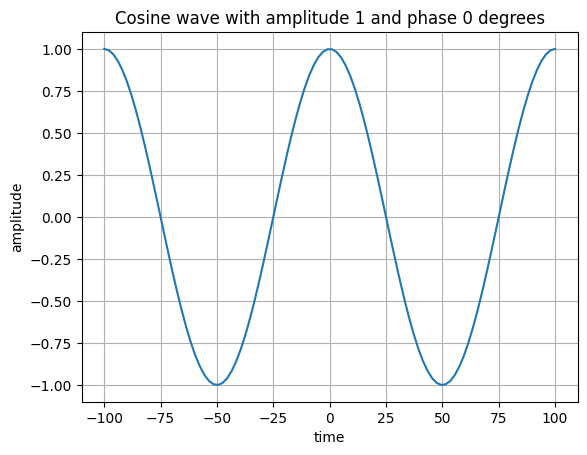

In [3]:
def cosine_wave(amplitude, phase_deg):
    x = np.linspace(start=-100, stop=100, num=100)
    y = amplitude * np.cos(2 * np.pi * x + np.deg2rad(phase_deg))

    plt.title(f"Cosine wave with amplitude {amplitude} and phase {phase_deg} degrees")
    plt.grid(True)
    plt.plot(x, y)
    plt.xlabel("time")
    plt.ylabel("amplitude")
    plt.show()


cosine_wave(amplitude=1, phase_deg=0)

<center>Unit Step Signal</center>


In [ ]:
def unit_step(start, end, total_samples):
    x = np.linspace(start=start, stop=end, num=total_samples)
    y = np.where(x >= 0, 1, 0)

    plt.title(f"Unit step function")
    plt.grid(True)
    plt.stem(x, y)
    plt.xlabel("time")
    plt.ylabel("amplitude")
    plt.show()


unit_step(start=-5, end=4, total_samples=10)

<center>Ramp Signal</center>


In [ ]:
def ramp_signal(start, end, total_samples):
    x = np.linspace(start=start, stop=end, num=total_samples)
    y = np.where(x >= 0, x, 0)

    plt.title(f"Ramp signal")
    plt.grid(True)
    plt.stem(x, y)
    plt.xlabel("time")
    plt.ylabel("amplitude")
    plt.show()


ramp_signal(start=-5, end=4, total_samples=10)

<center>Exponential Signal</center>


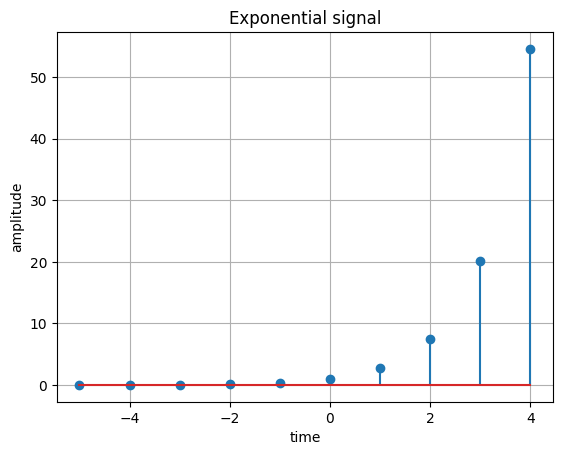

In [ ]:
def exponential_signal(start, end, total_samples):
    x = np.linspace(start=start, stop=end, num=total_samples)
    y = np.exp(x)

    plt.title(f"Exponential signal")
    plt.grid(True)
    plt.stem(x, y)
    plt.xlabel("time")
    plt.ylabel("amplitude")
    plt.show()


exponential_signal(start=-5, end=4, total_samples=10)

# DFT for book example


[-5.55111512e-17+0.00000000e+00j  5.55111512e-17-4.00000000e+00j
  1.41421356e+00+1.41421356e+00j -3.33066907e-16-7.21644966e-16j
  4.99600361e-16-1.43476297e-16j  1.72084569e-15+9.43689571e-16j
  1.41421356e+00-1.41421356e+00j -2.38697950e-15+4.00000000e+00j]


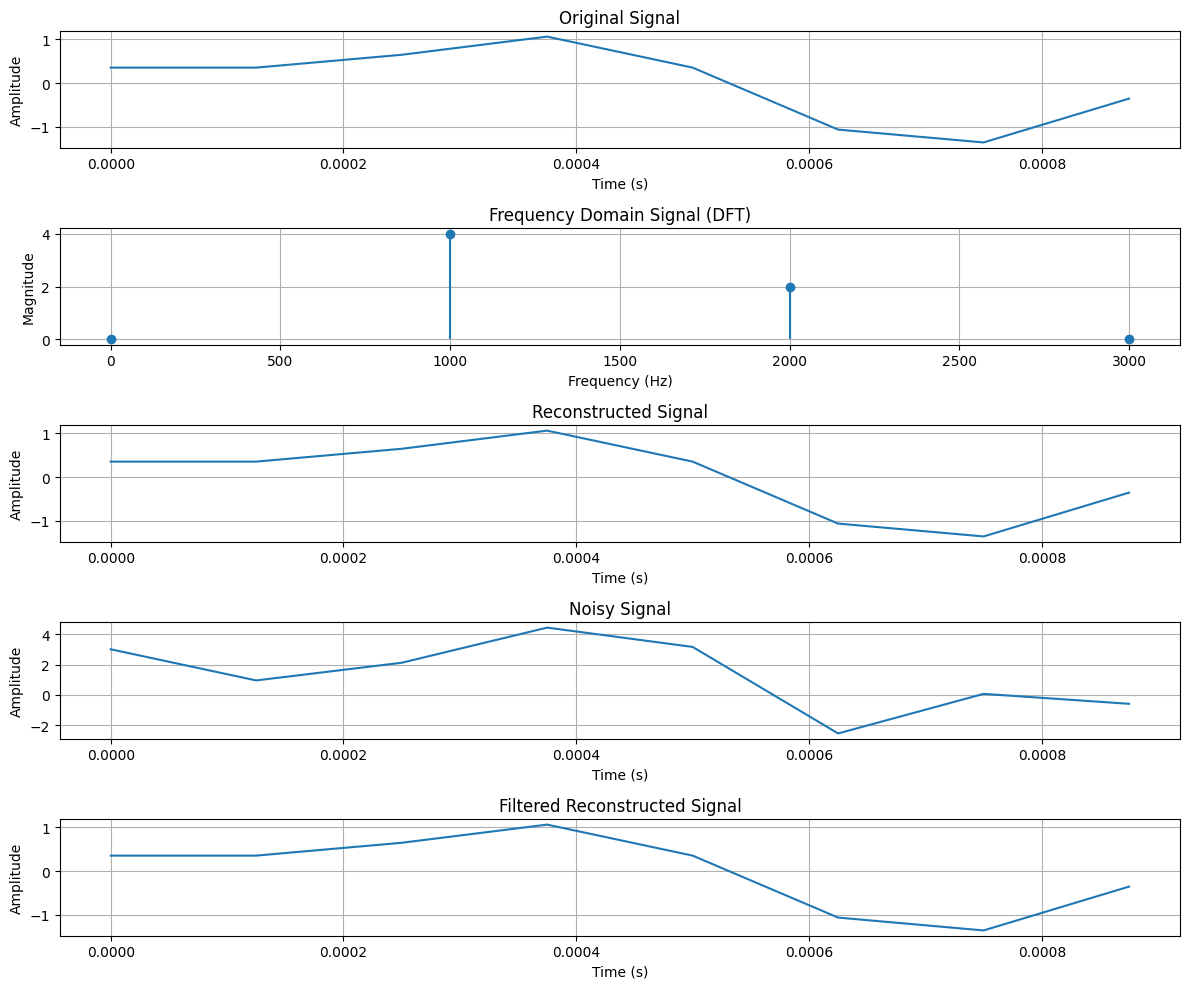

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
total_plots = 5

total_samples = 8000
N = 8
t = np.arange(N) / total_samples

x_t = np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 2000 * t + 3 * np.pi / 4)

plt.subplot(total_plots, 1, 1)
plt.plot(t, x_t)
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)


def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X


X_f = dft(x_t)

print(X_f)

N = len(X_f)
frequencies = np.fft.fftfreq(N, 1 / total_samples)

plt.subplot(total_plots, 1, 2)
plt.stem(frequencies[: N // 2], np.abs(X_f[: N // 2]), basefmt=" ")
plt.title("Frequency Domain Signal (DFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)


def idft(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(2j * np.pi * k * n / N)
    return x / N


x_t_reconstructed = idft(X_f)

plt.subplot(total_plots, 1, 3)
plt.plot(t, x_t_reconstructed.real)
plt.title("Reconstructed Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)


np.random.seed(0)
noise = 1.5 * np.random.randn(len(x_t))
noisy_signal = x_t + noise

plt.subplot(total_plots, 1, 4)
plt.plot(t, noisy_signal)
plt.title("Noisy Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)


cutoff_freq = 100
H = np.zeros_like(X_f)
H[:cutoff_freq] = 1
H[-cutoff_freq:] = 1
filtered_signal = x_t_reconstructed * H

plt.subplot(total_plots, 1, 5)
plt.plot(t, filtered_signal.real)
plt.title("Filtered Reconstructed Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()